In [6]:
#1.5.2 넘파이 배열 생성하기
import numpy as np
x = np.array([1.0, 2.0, 3.0])
print(x)

[1. 2. 3.]


In [2]:
type(x)

numpy.ndarray

In [3]:
#1.5.3 넘파이의 산술연산
x = np.array([1.0, 2.0, 3.0])
y = np.array([2.0, 4.0, 6.0])
x+ y

array([3., 6., 9.])

In [4]:
x*y

array([ 2.,  8., 18.])

In [5]:
x/y

array([0.5, 0.5, 0.5])

In [6]:
x**y

array([  1.,  16., 729.])

In [10]:
#1.5.4 넘파이의 N차원 배열
A = np.array([[1,2], [3, 4]])
print(A)

[[1 2]
 [3 4]]


In [11]:
A.shape

(2, 2)

In [12]:
A.dtype

dtype('int32')

In [13]:
B = np.array([[3, 0], [0, 6]])
A + B

array([[ 4,  2],
       [ 3, 10]])

In [14]:
A*B

array([[ 3,  0],
       [ 0, 24]])

In [15]:
#1.5.5 브로드 캐스트 : 형상이 다른 배열끼리 계산
#스칼라값 : 크기만 있고 방향이나 위치 정보가 없는 값
A = np.array([[1,2], [3, 4]])
B = np.array([10, 20])
A*B

array([[10, 40],
       [30, 80]])

In [16]:
#1.5.6 원소 접근
X = np.array([[51,55], [14, 19], [0, 4]])
print(X)

[[51 55]
 [14 19]
 [ 0  4]]


In [17]:
X[0]

array([51, 55])

In [18]:
X[0][1]

55

In [19]:
for row in X:
    print(row)

[51 55]
[14 19]
[0 4]


In [20]:
#다차원 배열을 일차원으로 평탄화
X = X.flatten()
print(X)

[51 55 14 19  0  4]


In [21]:
#인덱스가 0,2,4인 원소 가져오기
X[np.array([0,2,4])]

array([51, 14,  0])

In [22]:
X > 15

array([ True,  True, False,  True, False, False])

In [23]:
#15이상인 값만 가져오기
X[X>15]

array([51, 55, 19])

In [63]:
#1.6 Matplotlib
#1.6.1 단순한 그래프 그리기
import matplotlib.pyplot as plt
x = np.arange(0, 6, 0.1)
y = np.sin(x)

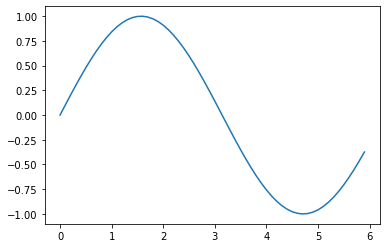

In [25]:
plt.plot(x, y)
plt.show()

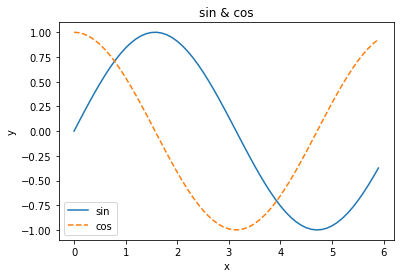

In [27]:
#1.6.2 pyplot의 기능
x = np.arange(0, 6, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, label = "sin")
plt.plot(x, y2, linestyle = '--', label = 'cos')
plt.xlabel("x")
plt.ylabel("y")
plt.title('sin & cos')
plt.legend()
plt.show()

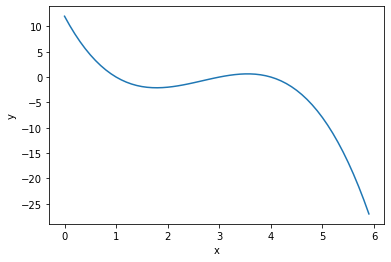

In [33]:
x = np.arange(0, 6, 0.1)

y = -(x -1)*(x - 3)*(x - 4)

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

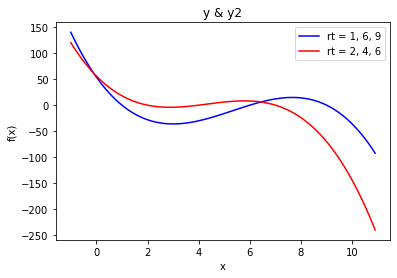

In [36]:
x = np.arange(-1, 11, 0.1)

y = -(x - 1)*(x - 6)*(x - 9)
y2 = -(x-2)*(x-4)*(x-7)

plt.plot(x, y, label = 'rt = 1, 6, 9', c = 'blue')
plt.plot(x, y2, label = 'rt = 2, 4, 6', c = 'red')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title('y & y2')
plt.legend()
plt.show()

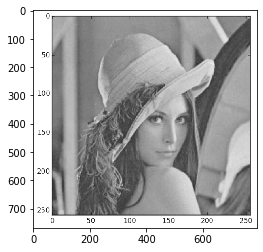

In [37]:
#1.6.3 이미지 표시하기
from matplotlib.image import imread

img = imread('../data/fig 1-5.png')
plt.imshow(img)
plt.show()

# Chapter 2 퍼셉트론

In [ ]:
#퍼셉트론 : 신경망의 기원이 되는 단층신경망 알고리즘
#다수의 신호를 입력으로 받아 하나의 신호를 출력
#뉴런에서 보내온 신호의 총합이 임계점(기호로 세타를 사용)을 넘어설 때만 1을 출력(뉴런 활성화)
#퍼셉트론은 복수의 입력 신호 각각에 고유한 가중치를 부여한다.
#가중치는 각 신호 결과에 주는 여향력을 조절하는 요소로 작용한다.

In [38]:
#2.3 퍼셉트론 구현하기
#2.3.1 간단한 구현부터
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = w1*x1 + w2*x2
    if tmp <= theta :
        return 0
    elif tmp > theta :
        return 1

In [40]:
print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

0
0
0
1


In [41]:
#2.3.2 가중치와 편향 도입
x = np.array([0, 1])  #입력
w = np.array([0.5, 0.5]) #가중치
b = -0.7 #편향
x*w

array([0. , 0.5])

In [42]:
np.sum(w*x)

0.5

In [43]:
np.sum(w*x) + b

-0.19999999999999996

In [54]:
#2.3.3 가중치와 편향 구현하기
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) #가중치에 0.5대입
    b = -0.7
    tmp = np.sum(w*x) + b  #activation function, threshold
    if tmp <= 0 :
        return 0
    else : 
        return 1

In [55]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) #AND와는 가중치만 다르다
    b = 0.7  
    tmp = np.sum(w*x) + b #activation function, threshold
    if tmp <= 0 :
        return 0
    else : 
        return 1

In [56]:
print(NAND(0, 0))
print(NAND(1, 0))
print(NAND(0, 1))
print(NAND(1, 1))

1
1
1
0


In [57]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b #activation function, threshold
    if tmp <= 0 :
        return 0
    else : 
        return 1

In [58]:
print(OR(0, 0))
print(OR(1, 0))
print(OR(0, 1))
print(OR(1, 1))

0
1
1
1


In [ ]:
#2.4 퍼셉트론의 한계
#직선 하나로 나눈 영역만 표현 가능
#즉 단층 퍼셉트론으로는 XOR 게이트를 표현할 수 없다.(비선형 영역 분리가 불가능하다)

In [59]:
#2.5 다층 퍼셉트론으로 층을 하나 더 쌓아서 비선형 영역 구현
#2.5.2 XOR 게이트 구현하기
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

print(XOR(0, 0))
print(XOR(1, 0))
print(XOR(0, 1))
print(XOR(1, 1))

0
1
1
0


# Chapter 3. 신경망

In [60]:
#3.2 활성화 함수 : 임계값을 경계로 출력이 바뀌는 함수
#3.2.1 시그모이드 함수
import math
1/(1+math.exp(-1.0))

0.7310585786300049

In [62]:
1/(1+math.exp(-2.0))

0.8807970779778823

In [63]:
#3.2.2 계단 함수 구현하기
def step_function(x):
    if x > 0:
        return 1
    else :
        return 0

In [71]:
step_function(3.5)

1

In [ ]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [64]:
x = np.array([-1.0, 1.0, 2.0])
y = x > 0
y

array([False,  True,  True])

In [66]:
y = y.astype(np.int)
y

array([0, 1, 1])

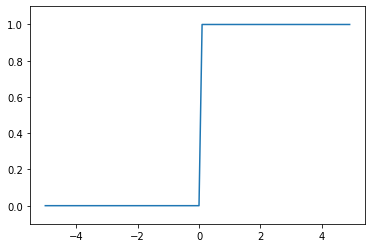

In [72]:
#3.2.3 계단 함수의 그래프
def step_function(x):
    return np.array(x > 0, dtype = np.int)
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [16]:
#3.2.4 시그모이드 함수 구현하기
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [74]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [75]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [76]:
1.0/t

array([1.        , 0.5       , 0.33333333])

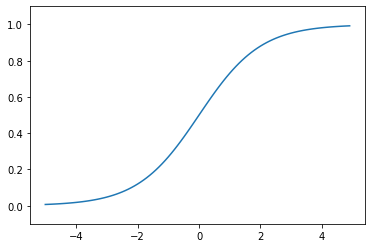

In [77]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

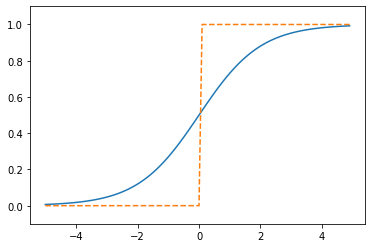

In [79]:
#3.2.5 시그모이드 함수와 계단 함수 비교
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
y1 = step_function(x)
plt.plot(x, y)
plt.plot(x, y1, linestyle = '--')
plt.ylim(-0.1, 1.1)
plt.show()

In [ ]:
#시그모이드 함수의 매끈함이 신경망 학습에서 아주 중요한 역할을 하게 된다.
#퍼셉트론에서는 뉴런 사이에 0 혹은 1이 흘렀다면 신경망에서는 연속적인 실수가 흐른다.

In [80]:
#3.2.7 ReLU 함수 Rectified Linear Unit
#입력이 0을 넘으면 그 입력을 그대로 출력하고, 0이하이면 0을 출력하는 함수
def relu(x):
    return np.maximum(0, x)

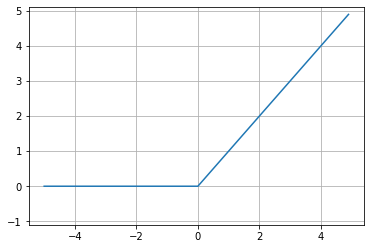

In [82]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.1, 5.1)
plt.grid()
plt.show()

In [83]:
#3.3 다차원 배열의 계산
#3.3.1 다차원 배열
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [84]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [86]:
#3.3.2 행렬의 곱
A = np.array([[1, 2], [3, 4]])
print(A.shape)
B = np.array([[5, 6], [7, 8]])
print(B.shape)
np.dot(A, B) #행렬의 곱

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

In [87]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape)
B = np.array([[1, 2], [3, 4], [5,6]])
print(B.shape)
np.dot(A, B) #행렬의 곱

(2, 3)
(3, 2)


array([[22, 28],
       [49, 64]])

In [91]:
#A의 첫번째 차원의 원소수와 C의 행 수가 같아야 계산이 된다.
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape)
C = np.array([[1, 2], [3, 4]])
print(C.shape)
np.dot(A, C)

(2, 3)
(2, 2)


ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [92]:
A = np.array([[1, 2],[3, 4], [5, 6]])
B = np.array([7, 8])
np.dot(A, B)

array([23, 53, 83])

In [94]:
#3.3.3 신경망에서의 행렬 곱
X = np.array([1, 2])
print(X.shape)
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
print(W.shape)
Y = np.dot(X, W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


In [96]:
#3.4 3층 신경망 구현하기
#3.4.2 각 층의 신호 전달 구현하기
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(B.shape)
print(X.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(2,)


In [97]:
#은닉층에서의 가중치 합을 a로 표기하고 활성화 함수 h()로 변환된 신호를 z로 표기한다.
#다음층으로 가기 전에 활성화 함수를 거친다.
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [98]:
#1층에서 2층으로 가는 과정을 구현
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [99]:
#2층에서 출력층으로 신호 전달

def identity_function(x):  #항등함수 생성
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

In [100]:
#3.4.3 구현 정리

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]] )
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'] ,network['W3'] 
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [103]:
#3.5 출력층 설계하기
#3.5.1 항등 함수와 소프트맥스 함수 구현하기
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)  #지수 함수
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [110]:
#NumPy의 np.exp() 함수는 밑(base)이 자연상수 e 인 지수함수 y = e의 x승 로 변환해줍니다.
#(참고로, 자연상수 e 는 2.71828182846... 의 값을 가지는 무리수이며, 
#수학자의 이름을 따서 '오일러의 수(Euler's number)' 또는 '네이피어의 수(Napier's number)'라고도 함)
#np.exp(2) = (2.71828182846..)**2

7.38905609893065

In [18]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / exm_exp_a
    
    return y

In [106]:
#3.5.2 소프트맥스 함수 구현 시 주의점
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))
#큰 값을 넘으면 오버플로우가 일어나 제대로 계산되지 않는다

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [107]:
#오버플로우 대책으로 배열에서 가장 큰 수를 뽑아 빼준다.
c = np.max(a)
a - c

array([  0, -10, -20])

In [20]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  #오버플로우 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [109]:
#소프트맥스의 총합은 항상 1이다. -> 이 성질 덕분에 소프트맥수 함수의 출력을 확률로 해석할 수 있다.
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

In [5]:
#3.6 손글씨 숫자 인식
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [6]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [8]:
%matplotlib inline
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)

img = x_train[0]
label = t_train[0]
print(label)
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)
img_show(img)

5
(784,)
(28, 28)


In [ ]:
#3.6.2. 신경망의 추론 처리
#이미지의 숫자가 무엇인지 구분해내는 3층 신경망 구현
    #입력층 뉴런 784 (28 * 28)
    #출력층 뉴런 10개 (0 - 9까지 숫자 구분)
    #은닉층 1 뉴런 50개 (임의 지정값)
    #은닉층 2뉴런 100개 (임의 지정값)

#sample weight.pkl에는 가중치와 평향 매개변수가 딕셔너리 변수로 저장되어 있다.

In [23]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = True, one_hot_label = False)
    return x_test, t_test

def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'] ,network['W3'] 
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [24]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])  #각 레이블의 확률을 넘파이 배열로 반환
    p = np.argmax(y)  #가장 확률이 높은 원소의 인덱스 구하기(예측결과)
    if p == t[i]:
        accuracy_cnt += 1    
print("Accuracy:" + str(float(accuracy_cnt)/ len(x))) 
#예측한 결과값과 정답 레이블을 비교하여 맞힌 숫자를 세고 전체 모수로 나누어 정확도를 구한다.

Accuracy:0.9352


In [27]:
#3.6.3 배치처리(하나로 묶은 입력데이터)
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'] ,network['W3'] 

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

#다차원 배열의 대응하는 차원의 원소 수가 일치한다.

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [29]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):  #range 함수가 반환하는 리스트를 바탕으로 x[i:i+batch_size]에서 입력 데이터를 묶는다.
    x_batch = x[i:i+batch_size]         #배치 사이즈가 100이므로 X[0:100], X[100: 200],X[200: 300] ..같이 묶어서 꺼낸다.
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)   #각 행마다 최대값 인덱스 가져오기(예측결과)
print(y)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt)/ len(x))) 

Accuracy:0.9352


In [33]:
x

array([[0.1, 0.8, 0.1],
       [0.3, 0.1, 0.6],
       [0.2, 0.5, 0.3],
       [0.8, 0.1, 0.1]])

In [36]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis = 1) #각 행마다 최대값 인덱스 가져오기
print(y)

[1 2 1 0]


In [38]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y == t)
np.sum(y ==t)

[ True  True False  True]


3

# Chapter 4. 신경망 학습

In [39]:
#4.2 손실 함수 loss function, cost function
#매개변수 값을 탐색하기 위한 지표로 손실함수를 사용한다.
#4.2.1 평균 제곱 오차
#가장 많이 쓰이는 손실 함수

In [41]:
#신경망이 추정한 값
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

#정답 레이블 (정답은 2)
t = [0, 0, 1, 0 , 0, 0 , 0, 0, 0, 0]

In [40]:
#평균 제곱 오차 함수 정의 : 각 원소의 예측한 값과 정답의 차를 제곱한 후 총합을 구한다.
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

In [43]:
# 정답이 '2'일 확률이 가장 높다고 추정(0.6)
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(mean_squared_error(np.array(y1), np.array(t)))

0.09750000000000003


In [45]:
#7이 정답일 확률이 가장 높다고 추정함(0.6) -> 정답은 2
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

print(mean_squared_error(np.array(y), np.array(t)))

0.5975


In [46]:
#4.2.2 교차 엔트로피 오차
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y + delta)) #작은 델타값을 더해 마이너스 무한대를 피한다.

In [47]:
#정답 레이블 (정답은 2)
t = [0, 0, 1, 0 , 0, 0 , 0, 0, 0, 0]

#예측하여 나온 결과값이 2일 확률이 제일 높다고 나온 경우
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y1), np.array(t)))

0.510825457099338


In [48]:
#7이 정답일 확률이 가장 높다고 추정함(0.6) -> 정답은 2
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

2.302584092994546


In [49]:
#4.2.3 미니배치 학습
#6만개의 데이터 중에 무작위로 10개만 선택
print(np.random.choice(60000, 10))

[ 6299 36471 48135 20197 23770 22175 21174 34614 16259 51717]


In [53]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(one_hot_label = True, normalize = False)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [52]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [55]:
#4.2.4 교차 엔트로피 오차 구현하기
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y + 1e-7))/batch_size

In [58]:
#정답 레이블 교차 엔트로피 오차 구현하기
def cross_entropy_error2(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y[np.arange(batch_size), t]))/batch_size

In [ ]:
#4.2.5 왜 손실 함수를 설정하는가?
#정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문에 지표로 사용하면 안된다.
#출력과 기울기가 연속적으로 변한다. 즉 시그모이드 함수는 어떤 경우에도 0이 되지 않는다. 
#신경망 학습에서 중요한 성질로 기울기가 0이 되지 않는 덕분에 신경망이 올바르게 학습할 수 있다
#매개변수의 미분을 계산하고 그 미분값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복한다.

In [65]:
#4.3 수치 미분
#4.3.1 미분
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h))/(2*h)

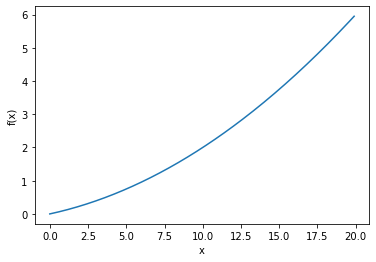

In [66]:
#4.3.2 수치 미분의 예

def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h))/(2*h)

def function_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()

In [69]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


In [71]:
#4.3.3 편미분
#변수가 여럿인 함수에 대한 미분을 편미분이라고 한다.
#모든 변수의 편미분의 벡터로 정리한 것을 기울기 gradient 라고 한다.
#함수의 기울기를 활용하는 경사법을 사용해 손실함수의 값을 작게 만든다.
def function_tmp1(x0):
    return x0*x0 + 4.0 **2.0

def function_tmp2(x1):
    return 3.0*2.0 + x1**x1

print(numerical_diff(function_tmp1, 3.0))
print(numerical_diff(function_tmp2, 4.0))

6.00000000000378
610.8913629813628


# Chapter 5. 오차역전파법

In [ ]:
#5.1 계산 그래프
#사과 가격이 올랐을 때 지불 금액이 얼마나 증가하는가, 즉 사과의 미분값을 역전파를 이용해 구할 수 있다.
#사과가격의 역전파 : 1 -> 1.1 -> 2.2 로 사과 가격에 대한 지불 금액의 미분값은 2.2이다.
#이는 사과 가격이 1원 오르면 최종 금액은 2.2원 오른다는 의미이다. 

#5.2 연쇄법칙
#x의 미분 = y
#y의 미분 = x
#국소적 미분을 전달하는 연쇄법칙 chain rule이 계산 그래프 상의 역전파와 동일하다.

#5.3 역전파
#덧셈노드의 역전파는 1을 곱해 입력 값을 그대로 다음 노드로 흘려보낸다.
#곱셈노드의 역전파는 상류의 값에 순전파 때의 입력 신호들을 서로 바꾼 값을 곱해서 하류로 보낸다.

#5.3.3 사과 쇼핑의 예
#사과 가격의 미분 : 2.2
#사과 갯수의 미분 : 110
#소비세의 미분 : 200
#-> 소비세와 사과 가격이 같은 양만큼 오르면 최종 금액에는 소비세가 200의 크기로, 사과 가격이 2.2크기로 영향을 준다.

In [1]:
#5.4. 단순한 계층 구현하기
#5.4.1  곱셈 계층
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
    
    def forward(self, x, y): #순전파
        self.x = x
        self.y = y
        out = x * y
        
        return out
    
    def backward(self, dout):
        dx = dout * self.y  #x와 y를 바꿔서 연산
        dy = dout * self.x
        
        return dx, dy

In [2]:
#사과 쇼핑의 예 구현하기
apple = 100
apple_num = 2
tax = 1.1

#계층
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

#순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

220.00000000000003


In [3]:
#사과 쇼핑의 예 역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


In [4]:
#5.4.2 덧셈 계층
class AddLayer:
    def __init__(self):
        pass   #초기화 단계에서 아무일도 일어나지 않음
    
    def forward(self, x, y):  #순전파에서 더한 인수를 반환
        out = x + y
        return out
    
    def backward(self, dout):  #역전파에서는 1을 곱해 반환 -> 값이 변하지 않음
        dx = dout * 1
        dy = dout * 1
        return dx, dy

In [ ]:
#5.5 활성화 함수 계층 구현하기
#신경망을 구성하는 층(계층)을 각각의 클래스로 구현하기

#5.5.1 ReLU 계층
#순전파 때의 입력인 x가 0보다 크면 역전파는 상류의 값을 그대로 하류로 흘린다.
#순전파 때 x가 0 이하이면 역전파 때는 하류로 신호를 보내지 않는다.(0을 내보냄)
#mask라는 인스턴스 변수는 0이하인 인덱스에는 True, 0이상은 False를 유지한다.
#전기 회로의 스위치 on/off에 비유할 수 있음

#5.5.2 시그모이드 계층
#시그모이드 역전파는 순전파의 출력(y)만으로 계산할 수 있다.
#노드를 그룹화하여 시그모이드 계층의 세세한 내용을 노출하지 않고 입력과 출력에만 집중할 수 있다.

In [7]:
#5.6 Affine/ Softmax 계층 구현하기

#5.6.1 Affine  계층
#스칼라값 대신 행렬(다차원 배열)이 노드 사이를 흐른다.
#행렬끼리의 계산은 대응하는 차원의 원소 수를 일치시켜야 연산이 가능해지므로
#행렬 곱(dot)의 역전파는 행렬의 대응하는 차원의 원소 수가 일치하도록 곱을 조립하여 구할 수 있다.

#5.6.2 배치용 Affine 계층
#데이터 N개를 묶어 순전파하는 경우
#입력인 X의 형상이 (N, 2)인 점만 다르다.
#편향은 각 데이터에 일일이 더해진다.
#역전파의 경우에도 두 데이터에 대한 미분을 데이터마다 더해서 구한다.

X_dot_W = np.array([[0, 0, 0], [10, 10, 10]])
B = np.array([1, 2, 3])
X_dot_W

array([[ 0,  0,  0],
       [10, 10, 10]])

In [8]:
X_dot_W + B

array([[ 1,  2,  3],
       [11, 12, 13]])

In [10]:
#Affine 클라스 구현하기
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
    
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db =  bp.sum(dout, axis = 0)
        
        return dx

In [11]:
#5.6.3 Softmax-with-Loss 계층
#소프트맥스 함수는 입력값을 정규화하여 출력한다.(출력의 합이 1이 되도록 변형)
#신경망의 역전파에서는 Softmax계층의 출력 y와 정답 레이블 t의 차분인 오차 (y - t)가 앞 계층에 전해진다 -> 신경망 학습의 중요한 성질!
#신경망 학습의 목적이 출력이 정답 레이블과 가까워지도록 가중치 매개변수의 값을 조정하는 것이므로 
#오차를 효율적으로 앞 계층에 전달해야 한다.
#전달되는 오차의 값이 클수록 신경망이 학습하는 정도가 커진다.

#Softmax-with-Loss 계층 구현하기
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None
    
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout = 1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t)/batch_size  
        
        return dx

In [ ]:
#5.7 오차역전파법 구현하기
#5.7.1 신경망 학습의 전체 그림
#오차역전파법은 신경망 학습의 두번째 단계인 기울기 산출에서 필요하다.
#미분 대신 오차역전파법을 사용하면 기울기를 효율적이고 빠르게 구할 수 있다.

In [ ]:
#5.7.2. 오차역전파법을 적용한 신경망 구현하기
#계층을 순서가 있는 딕셔너리로 만들어 순전파 때는 입력한 순서대로, 역전파 때는 역순으로 호출한다.

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

In [ ]:
#5.7.3 오차역전파법으로 구한 기울기 검증하기


# Keras 실습

In [ ]:
#keras.io/losses
#Keras 설치 : pip install keras
#Keras를 설치하면 tensorflow와 theano가 같이 설치된다. (케라스는 텐서플로우를 기반으로 만들어졌기 때문)
#에러시 : conda update -all
#pip install tensorflow
#pip install msgpack
#pip install keras

In [3]:
import keras
import numpy as np
import pandas as pd

In [ ]:
#1. 케라스로 인공신경망 모델을 만듬
model = keras.modelsSequentiql()

In [ ]:
#2. 멤버 함수 add()를 이용해 인공지능 계층 추가
model.add(keras.layers.Dense(1, input_shape = (1,))) #계층 하나 추가

In [ ]:
#3. 만든 모델을 어떻게 학습할지 파라미터로 지정하고 컴파일
model.compile("SGD", "mse") #옵티마이저, 손실함수 옵션(확률경사 하강법, 평균제곱오차 사용)

In [7]:
#y값을 예측하는 케라스 예제
X = np.array([0, 1, 2, 3, 4, 5])
y = X * 2 + 1

#인공신경망 모델링
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_shape = (1,))) #입력노드 하나와 가중치 하나를 갖는 선형 처리 계층
model.compile("SGD", "mse")  #옵티마이저, 손실함수 옵션

#주어진 데이터로 모델 학습
model.fit(X, y, epochs = 1000, verbose = 0) #epochs = 학습반복횟수, #verbose = 얼마나 자세히 정보를 표시할 것인지 지정(0, 1, 2)

#성능평가
predict = model.predict(X).flatten() 
#입력값을 주고 출력값을 예측하는 함수 predict()로 모델이 예측한 값을 1차원 배열로 반환

print('Target :', y)
print('Predict:', predict)

Target : [ 1  3  5  7  9 11]
Predict: [ 0.9998007  2.999857   4.999913   6.9999695  9.000026  11.000082 ]


In [8]:
import keras
keras.__version__

'2.2.4'

In [12]:
#MNIST 데이터셋에 
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 9s 1us/step


In [13]:
train_images.shape  #훈련세트는 28*28 화소의 6만장의 이미지로 구성되어 있다.

(60000, 28, 28)

In [14]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
test_images.shape #테스트세트는 28*28 화소의 만장의 이미지

(10000, 28, 28)

In [16]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

TypeError: Invalid shape (784,) for image data

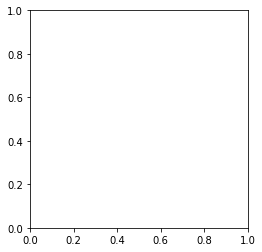

In [75]:
#다섯번째 샘플 확인
import matplotlib.pyplot as plt
digit = train_images[4]

plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [19]:
#신경망 구성 순서
    #훈련 이미지와 라벨을 네트워크에 주입
    #네트워크는 이미지와 레이블을 연관시킬 수 있도록 학습된다
    #마지막에 테스트 이미지에 대한 예측을 네트워크에 요청 -> 이 예측이 테스트 라벨과 맞는지 확인

from keras import models  #각 계층을 연결하여 모델링, 학습, 컴파일, 평가 하는 모듈
from keras import layers  #각 계층을 만드는 모듈

network = models.Sequential() #models.Sequential() 클래스로 객체생성
network.add(layers.Dense(512, activation = 'relu',  #계층 추가: 히든레이어 512개가 입력되어 렐루 함수를 거쳐 출력 -> 2층으로 입력
                        input_shape = (28 * 28,)))  
network.add(layers.Dense(10, activation = 'softmax')) #최종 출력은 소프트맥스 함수를 거쳐 10개만 출력

In [21]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [22]:
network.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
#데이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 0과 1사이로 스케일 조정
#현재 훈련이미지는 0과 255 사이의 값은 uint8 타임의 (60000, 28, 28) 크기의 배열로 저장되어 있다.
#이 데이터를 0과 1사이의 값을 가지는 float32 타입의 (60000, 28, 28) 크기의 배열로 바꿔준다.

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [24]:
#레이블을 범주형으로 인코딩(0과 1로 표현되는 벡터 10개)
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [25]:
#fit메서드로 모델 학습
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)  #128개씩 묶어서 학습 수행

#->>훈련을 시킬수록 로스는 줄고 정확도는 향상되는 것을 볼 수 있다.

W0830 11:41:47.377038  2424 deprecation.py:323] From C:\Users\a\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.2564 - acc: 0.9251
Epoch 2/5
60000/60000 [==============================] - ETA: 0s - loss: 0.1042 - acc: 0.969 - 3s 54us/step - loss: 0.1042 - acc: 0.9690
Epoch 3/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0682 - acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.0486 - acc: 0.9856
Epoch 5/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.0372 - acc: 0.9891


In [ ]:
#Epoch 1/5 : 설정한 5번의 반복학습 중 첫번째 수행 (6만장 중 6만장이 훈련에 사용됨)
#60000/60000 : 6만장 중 6만장이 훈련에 사용됨
#3s : 학습에 걸린 시간 3초
#loss : 손실 함수로 구한 오류율 ->학습 데이터로 평가한 성능 손실이 0.2564
#acc : 정확도 

In [122]:
#evaluate()함수는 모델에 X_test를 입력해 출력값을 예측하고 그 결과와 y_test를 비교하여 성능을 보여준다.
#-> test loss, test accuracy 반환
test_loss, test_acc = network.evaluate(test_images, test_labels)

ValueError: Error when checking target: expected dense_5 to have shape (10,) but got array with shape (1,)

In [27]:
#정확도 구하기
print('test_acc:', test_acc)  

#훈련세트 정확도보다 약간 낮은 정확도 -> 과대적합

test_acc: 0.9815


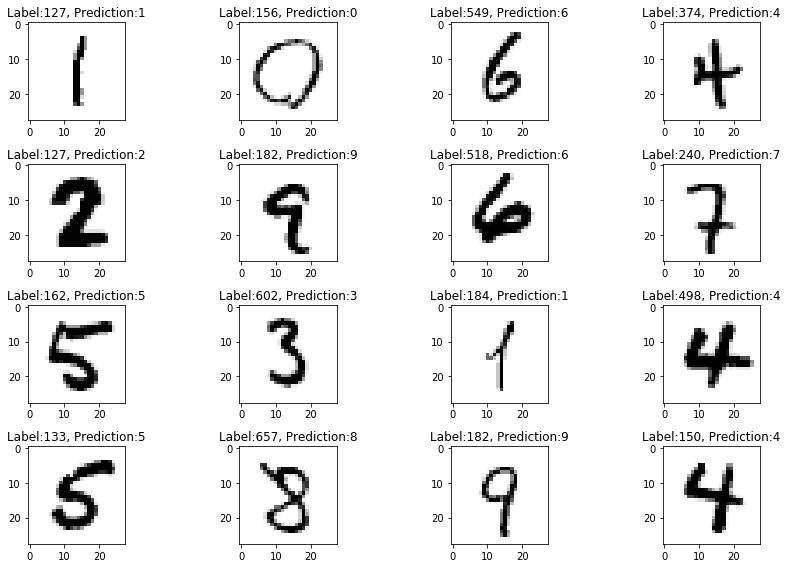

In [30]:
#예측이 틀린 이미지 출력
import random
import numpy as np

predicted_result = network.predict(test_images)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(test_images, axis=1)

wrong_result = []

(train_images, train_labels), (test_images, test_labels)
#(X_train, y_train), (X_test, y_test) = mnist.load_data()

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:  #예측결과와 정답이 같지 않은 경우만 리스트에 추가
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(test_images[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

In [39]:
#IMDB 데이터셋
#케라스에 내장되어 있는 오만개의 영화리뷰 데이터셋
#리뷰가 숫자 시퀀스로 변환되어 있다-> 여기서 숫자는 사전에 있는 고유단어를 나타낸다.
#train data와 test data는 리뷰의 목록으로 

from keras.datasets import imdb

#자주 나타나는 단어 만개만 가져와서 데이터 설정 
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

ValueError: Object arrays cannot be loaded when allow_pickle=False

In [40]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [42]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [44]:
train_labels[0]

1

In [45]:
max([max(sequence) for sequence in train_data])

9999

In [47]:
#word_index는 단어와 정수 인덱스를 매핑한 딕셔너리이다.
word_index = imdb.get_word_index()

#정수 인덱스와 단어를 매핑하도록 뒤집는다.
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

#리뷰 디코딩 - 0, 1, 2 는 패딩, 문서 시작, 사전에 없음 을 위한 인덱스이다.
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [48]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [50]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        #results[i]에서 특정 인덱스의 위치를 1로 만듭니다.
        results[i, sequence] = 1.   #OneHotEncoding 으로 나타나는 문자의 인덱스만 1, 나머지는 0으로 변환
    
    return results

#벡터로 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [51]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

array([0., 1., 1., ..., 0., 0., 0.])

In [52]:
y_train = np.asarray(train_labels).astype('float32')
y_test =  np.asarray(test_labels).astype('float32')

In [89]:
#신경망 모델 만들기
#입력데이터가 벡터, 레이블을 스칼라(1또는 0)
#렐루를 사용한 완전 연결층 쌓기

from keras import models  
from keras import layers 

model = models.Sequential()  #input_shape는 처음에 한번만 넣어준다,
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))  #만개 입력, 16개 출력 -> 다음 층으로 입력
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [102]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [111]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [112]:
#손실함수 : 이진분류이기 때문에 크로스엔드로피 선택
#옵티마이저 : RMSProp
from keras import losses
from keras import metrics

#model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              #loss=losses.binary_crossentropy,
              #metrics=[metrics.binary_accuracy])

In [113]:
#훈련 검증
#훈련하는 동안 처음 본 데이터에 대한 모델의 정확도를 측정하기 위해서는 원본 훈련 데이터에서 만개의 샘플을 떼어내 검증세트를 만든다.
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [114]:
#이제 모델을 512개 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련
history = model.fit(partial_x_train, 
                    partial_y_train, 
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

#->훈련 손실이 에포크마다 감소하고 훈련 정확도는 에포크마다 증가

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.1572 - acc: 0.9471 - val_loss: 0.1874 - val_acc: 0.9286
Epoch 2/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.1205 - acc: 0.9629 - val_loss: 0.1798 - val_acc: 0.9331
Epoch 3/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.1024 - acc: 0.9701 - val_loss: 0.1767 - val_acc: 0.9347
Epoch 4/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.0829 - acc: 0.9782 - val_loss: 0.1945 - val_acc: 0.9274
Epoch 5/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.0685 - acc: 0.9831 - val_loss: 0.2060 - val_acc: 0.9248
Epoch 6/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.0559 - acc: 0.9869 - val_loss: 0.2271 - val_acc: 0.9196
Epoch 7/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.0445 - acc: 0.9902 - val_loss: 0.2464 - 

In [115]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

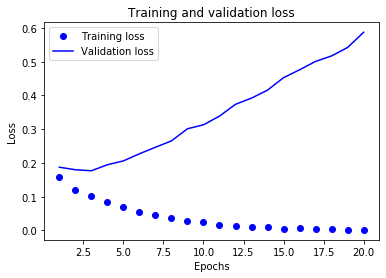

In [116]:
#훈련과 검증 데이터에 대한 손실과 정확도를 그리기

%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

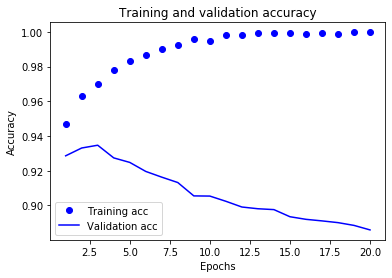

In [117]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [118]:
# epochs=4로 설정하고 다시 학습
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 93us/step - loss: 0.4504 - acc: 0.8241
Epoch 2/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.2611 - acc: 0.9094
Epoch 3/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.2011 - acc: 0.9280
Epoch 4/4
25000/25000 [==============================] - 3s 121us/step


In [119]:
results

[0.3069664917564392, 0.87912]

In [120]:
#1. 3개의 은닉 층을 사용하고 검증과 테스트 정확도에 어떤 영향을 미치는지 확인해보기 -> 손실 증가, 

model = models.Sequential() 
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))  
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 94us/step - loss: 0.4559 - acc: 0.8129
Epoch 2/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.2517 - acc: 0.9104
Epoch 3/4
25000/25000 [==============================] - 2s 71us/step - loss: 0.1967 - acc: 0.9284
Epoch 4/4
25000/25000 [==============================] - 3s 121us/step


In [121]:
print(results)

[0.32568399881362914, 0.87308]


In [133]:
#2. 층의 은닉 유닛을 추가하거나 줄여보세요 -> 32로 증가시켰을 때 
model = models.Sequential() 
model.add(layers.Dense(32, activation = 'relu', input_shape = (10000,)))  
model.add(layers.Dense(32,activation = 'relu'))
model.add(layers.Dense(32,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 109us/step - loss: 0.4327 - acc: 0.8091
Epoch 2/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.2402 - acc: 0.9104
Epoch 3/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.1900 - acc: 0.9283
Epoch 4/4
25000/25000 [==============================] - 3s 126us/step


In [134]:
#3. mse 손실 함수를 사용해보세요 
model = models.Sequential() 
model.add(layers.Dense(32, activation = 'relu', input_shape = (10000,)))  
model.add(layers.Dense(32,activation = 'relu'))
model.add(layers.Dense(32,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 3s 107us/step - loss: 0.1475 - acc: 0.8026
Epoch 2/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.0732 - acc: 0.9071
Epoch 3/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.0553 - acc: 0.9301
Epoch 4/4
25000/25000 [==============================] - 3s 127us/step
[0.08964300052821636, 0.88164]


In [135]:
#4. relu대신 tanh 함수를 사용해 보세요 -> 손실 증가, 정확도 약간 감소
model = models.Sequential() 
model.add(layers.Dense(32, activation = 'tanh', input_shape = (10000,)))  
model.add(layers.Dense(32,activation = 'tanh'))
model.add(layers.Dense(32,activation = 'tanh'))
model.add(layers.Dense(1,activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 3s 106us/step - loss: 0.1272 - acc: 0.8218
Epoch 2/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.0675 - acc: 0.9116: 2s - lo
Epoch 3/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.0534 - acc: 0.9319
Epoch 4/4
25000/25000 [==============================] - 4s 142us/step
[0.10276057963311672, 0.86716]


In [128]:
#뉴스 기사 분류
#1.데이터 준비
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


2113536/2110848 [==============================] - 2s 1us/step


ValueError: Object arrays cannot be loaded when allow_pickle=False

In [129]:
#1. 데이터 준비
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [137]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [138]:
word_index = reuters.get_word_index()

#정수 인덱스와 단어를 매핑하도록 뒤집는다.
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

#리뷰 디코딩 - 0, 1, 2 는 패딩, 문서 시작, 사전에 없음 을 위한 인덱스이다.
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 1s 2us/step


In [139]:
decoded_review

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [160]:
#데이터 인코딩
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        #results[i]에서 특정 인덱스의 위치를 1로 만듭니다.
        results[i, sequence] = 1.   #OneHotEncoding 으로 나타나는 문자의 인덱스만 1, 나머지는 0으로 변환
    
    return results

#데이터를 벡터로 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [161]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [162]:
# 레이블을 벡터로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test =  np.asarray(test_labels).astype('float32')

In [164]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [165]:
#2. 모델 구성(출력 클래스의 개수 46개, 스프트맥수 함수 사용)

from keras import models  
from keras import layers 

model = models.Sequential()  
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))  
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=512)

results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/20
8982/8982 [==============================] - 2s 200us/step - loss: 0.0203 - acc: 0.4461
Epoch 2/20
8982/8982 [==============================] - 1s 104us/step - loss: 0.0137 - acc: 0.5583
Epoch 3/20
8982/8982 [==============================] - 1s 107us/step - loss: 0.0101 - acc: 0.6527
Epoch 4/20
8982/8982 [==============================] - 1s 91us/step - loss: 0.0084 - acc: 0.7184
Epoch 5/20
8982/8982 [==============================] - 1s 89us/step - loss: 0.0072 - acc: 0.7612
Epoch 6/20
8982/8982 [==============================] - 1s 89us/step - loss: 0.0063 - acc: 0.7943
Epoch 7/20
8982/8982 [==============================] - 1s 87us/step - loss: 0.0055 - acc: 0.8241
Epoch 8/20
8982/8982 [==============================] - 1s 98us/step - loss: 0.0049 - acc: 0.8418
Epoch 9/20
8982/8982 [==============================] - 1s 109us/step - loss: 0.0044 - acc: 0.8521
Epoch 10/20
8982/8982 [==============================] - 1s 90us/step - loss: 0.0041 - acc: 0.8646
Epoch 11/20
898

In [166]:
#3. 훈련 검증 (훈련데이터에서 1000개의 샘플만 따로 떼어 검증 세트로 사용)
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [167]:
#4. 20번의 에포크로 모델을 학습 시키세요
history = model.fit(partial_x_train, 
                    partial_y_train, 
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 98us/step - loss: 0.0025 - acc: 0.9148 - val_loss: 0.0022 - val_acc: 0.9290
Epoch 2/20
7982/7982 [==============================] - 1s 96us/step - loss: 0.0025 - acc: 0.9153 - val_loss: 0.0024 - val_acc: 0.9260
Epoch 3/20
7982/7982 [==============================] - 1s 93us/step - loss: 0.0024 - acc: 0.9181 - val_loss: 0.0024 - val_acc: 0.9270
Epoch 4/20
7982/7982 [==============================] - 1s 92us/step - loss: 0.0024 - acc: 0.9199 - val_loss: 0.0025 - val_acc: 0.9270
Epoch 5/20
7982/7982 [==============================] - 1s 92us/step - loss: 0.0024 - acc: 0.9209 - val_loss: 0.0025 - val_acc: 0.9300
Epoch 6/20
7982/7982 [==============================] - 1s 93us/step - loss: 0.0023 - acc: 0.9212 - val_loss: 0.0025 - val_acc: 0.9300
Epoch 7/20
7982/7982 [==============================] - 1s 96us/step - loss: 0.0023 - acc: 0.9237 - val_loss: 0.0026 - val_acc: 0.9270
Epoch 8

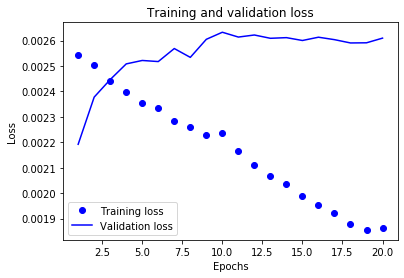

In [168]:
#5. 손실과 정확도 곡선을 그려보세요
history_dict = history.history
history_dict.keys()

%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [169]:
results = model.evaluate(x_test, y_test)
print(results)

2246/2246 [==============================] - 0s 219us/step
[0.007142852113573071, 0.7943009795722215]


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
iris = sns.load_dataset("iris")
print(iris.info())
print(iris['species'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
['setosa' 'versicolor' 'virginica']


In [4]:
from sklearn.preprocessing import LabelEncoder

X = iris.iloc[:, 0:4].values
y = iris.iloc[:, 4].values

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
print(Y)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [6]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(64, input_shape = (4,), activation = 'relu')) #입력 4개, 출력 64개
model.add(Dense(64, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

Using TensorFlow backend.
W0902 09:56:12.537445  3904 deprecation_wrapper.py:119] From C:\Users\a\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0902 09:56:12.574447  3904 deprecation_wrapper.py:119] From C:\Users\a\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0902 09:56:12.589448  3904 deprecation_wrapper.py:119] From C:\Users\a\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [ ]:
#Dense 레이어는 입력과 출력을 모두 연결
    #첫번째 인자 : 출력 뉴런의 수를 설정, 
    #input_dim : 입력 뉴런의 수를 설정,
    #init : 가중치 초기화 방법 설정)

#활성화함수 설정
    #relu : 은닉층에서 주로 사용
    #sigmoid : 주로 출력층에서 사용(주로 이진분류)
    #softmax : 주로 출력층에서 사용(주로 다중분류)

In [7]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

W0902 10:02:01.133384  3904 deprecation_wrapper.py:119] From C:\Users\a\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0902 10:02:01.173386  3904 deprecation_wrapper.py:119] From C:\Users\a\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [ ]:
#로스 함수는 현재 신경망 성능의 나쁨을 나타내는 지표. 작을수록 좋다.
#최적화기는 손실함수의 값을 낮추기 위한 매개변수 최적값을 찾는 문제를 수행한다.

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#서머리 함수를 이용해 위 모델을ㅇ 요약한 결과 
#1층은 (5*64) = 320 = 4 input + 1 bias 
#2층은 4*160
#3층은 3*64

In [9]:
hist = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

W0902 10:08:24.700323  3904 deprecation.py:323] From C:\Users\a\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0902 10:08:24.758326  3904 deprecation_wrapper.py:119] From C:\Users\a\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 1s 5ms/step - loss: 1.2162 - acc: 0.3250 - val_loss: 1.0298 - val_acc: 0.4000
Epoch 2/100
120/120 [==============================] - 0s 342us/step - loss: 1.0255 - acc: 0.4750 - val_loss: 0.9634 - val_acc: 0.5667
Epoch 3/100
120/120 [==============================] - 0s 525us/step - loss: 0.9148 - acc: 0.6917 - val_loss: 0.9291 - val_acc: 0.5667
Epoch 4/100
120/120 [==============================] - 0s 475us/step - loss: 0.8422 - acc: 0.6917 - val_loss: 0.8642 - val_acc: 0.5667
Epoch 5/100
120/120 [==============================] - 0s 500us/step - loss: 0.7805 - acc: 0.6917 - val_loss: 0.7966 - val_acc: 0.5667
Epoch 6/100
120/120 [==============================] - 0s 675us/step - loss: 0.7265 - acc: 0.6917 - val_loss: 0.7340 - val_acc: 0.5667
Epoch 7/100
120/120 [==============================] - 0s 492us/step - loss: 0.6762 - acc: 0.7000 - val_loss: 0.6780 - val_acc: 0.5667
Epoch 8/100


Epoch 61/100
120/120 [==============================] - 0s 650us/step - loss: 0.0980 - acc: 0.9750 - val_loss: 0.1342 - val_acc: 0.9667
Epoch 62/100
120/120 [==============================] - 0s 192us/step - loss: 0.0944 - acc: 0.9750 - val_loss: 0.1212 - val_acc: 0.9667
Epoch 63/100
120/120 [==============================] - 0s 233us/step - loss: 0.1042 - acc: 0.9667 - val_loss: 0.1183 - val_acc: 1.0000
Epoch 64/100
120/120 [==============================] - 0s 283us/step - loss: 0.0966 - acc: 0.9750 - val_loss: 0.1619 - val_acc: 0.9333
Epoch 65/100
120/120 [==============================] - 0s 267us/step - loss: 0.1010 - acc: 0.9750 - val_loss: 0.1374 - val_acc: 0.9667
Epoch 66/100
120/120 [==============================] - 0s 125us/step - loss: 0.0912 - acc: 0.9833 - val_loss: 0.1131 - val_acc: 1.0000
Epoch 67/100
120/120 [==============================] - 0s 317us/step - loss: 0.0923 - acc: 0.9667 - val_loss: 0.1130 - val_acc: 0.9667
Epoch 68/100
120/120 [==========================

In [10]:
print(hist.history['loss'])
print(hist.history['acc'])
print(hist.history['val_loss'])
print(hist.history['val_acc'])

[1.2161756038665772, 1.0254769841829936, 0.9147544066111247, 0.8421629746754964, 0.7804750800132751, 0.7264588514963786, 0.6762297749519348, 0.6332921703656514, 0.5934550444285075, 0.5575812617937724, 0.5243373036384582, 0.5033744553724925, 0.4735577384630839, 0.4485858678817749, 0.42728473742802936, 0.40775678157806394, 0.3911122898260752, 0.37075403531392415, 0.3518150468667348, 0.3352303485075633, 0.32108855644861856, 0.3077596664428711, 0.29668309092521666, 0.2859593828519185, 0.27496907909711205, 0.26305503050486245, 0.25248289008935293, 0.2418978085120519, 0.23086287180582682, 0.22253718872865041, 0.21354297995567323, 0.20582454999287922, 0.1976156562566757, 0.1899742752313614, 0.18463830053806304, 0.17699818114439647, 0.17235208849112194, 0.16406597743431728, 0.1579544335603714, 0.15239424804846446, 0.14791435599327088, 0.1442117303609848, 0.13868093887964886, 0.1373408704996109, 0.13339561422665913, 0.1295291632413864, 0.12470865845680237, 0.1221950446565946, 0.1190859665473302

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))

30/30 [==============================] - 0s 567us/step
Accuracy = 0.97


C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'lower'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


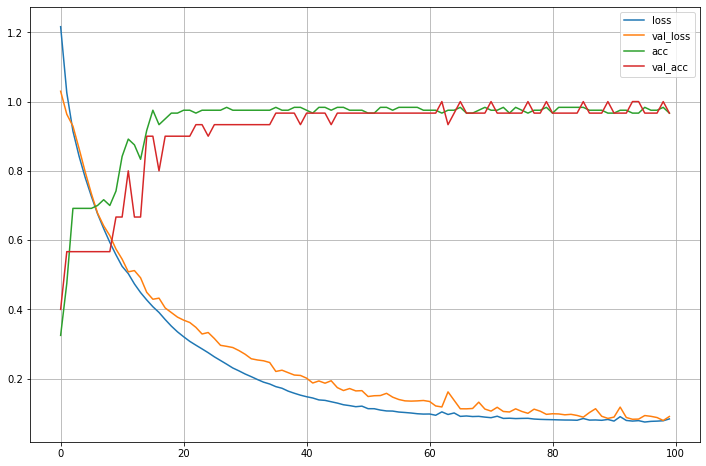

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['loss', 'val_loss', 'acc', 'val_acc'], loc = 'lower')
plt.grid()
plt.show()

In [15]:
#새 데이터 2개 품종 예측하기

from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis = 1)
y_pred_class = np.argmax(y_pred, axis = 1)

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

test_set = np.array([[5, 2.9, 1, 0.2]])
print("Predicted target anme : {}".format(iris['species'].unique()[model.predict_classes(test_set)]))
iris.query("species == 'versicolor'")

test_set = np.array([[7, 3.0, 5, 1.4]])
print("Predicted target name : {}".format(iris['species'].unique()[model.predict_classes(test_set)]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Predicted target anme : ['setosa']
Predicted target name : ['versicolor']


In [17]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils

In [27]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 데이터를 float32 자료형으로 변환하고 정규화하기 
X_train = X_train.reshape(60000, 784).astype('float32')
X_test  = X_test.reshape(10000, 784).astype('float')
X_train /= 255
X_test  /= 255
# 레이블 데이터를 0-9의 배열로 변환하기 
y_train = np_utils.to_categorical(y_train, 10)
y_test  = np_utils.to_categorical(y_test, 10)

In [28]:
model = Sequential()

model.add(Dense(512, input_shape = (784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))  #20퍼센트의 신경망 삭제
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [29]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = Adam(),
             metrics = ['accuracy'])

model.fit(X_train, y_train)

score = model.evaluate(X_test, y_test, verbose = 2)
print('loss=', score[0])
print('accuracy=', score[1])

Epoch 1/1
60000/60000 [==============================] - 16s 262us/step - loss: 0.2048 - acc: 0.9365
loss= 0.1023187273869291
accuracy= 0.9667


In [ ]:
model.predict

# Chapter7. 합성곱 신경망

In [32]:
from keras import layers
from keras import models

model = models.Sequential()                               #커널 사이즈는 필터의 크기
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',  #32개의 필터 적용(3 *3 사이즈의 윈도우)
                       input_shape = (28, 28, 1)))        #width = 28, height = 28, pixels = 1(흑백), 컬러는 3
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

In [ ]:
#합성곱 계층과 풀링 계층을 추가하여 데이터를 1차원으로 바꾸는 대신 차원정보를 그대로 유지해 신경망에 전달한다.
#풀링 계층은 컨볼루션 레이어 뒤에 와 합성곱 출력 값을 단순하게 압축해주고 정보를 컴팩트한 버젼으로 만들어준다
#케라스에서 CNN을 구현할 때 [width][height][pixels]형태로 input을 받는다.
#3차원의 컬러 이미지에 유용
#fully connected network와 달리 데이터의 일부분을 가져와 

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                36928     
__________

In [37]:
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [38]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
hist = model.fit(X_train, y_train, epochs = 5, batch_size = 64)

Epoch 1/5
60000/60000 [==============================] - 36s 596us/step - loss: 0.1758 - acc: 0.9455
Epoch 2/5
60000/60000 [==============================] - 35s 577us/step - loss: 0.0489 - acc: 0.9848
Epoch 3/5
60000/60000 [==============================] - 35s 577us/step - loss: 0.0334 - acc: 0.9898
Epoch 4/5
60000/60000 [==============================] - 35s 581us/step - loss: 0.0252 - acc: 0.9925
Epoch 5/5
60000/60000 [==============================] - 35s 582us/step - loss: 0.0198 - acc: 0.9936


In [40]:
score =  model.evaluate(X_test, y_test, verbose = 0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 0.03638685952193919
accuracy= 0.9903


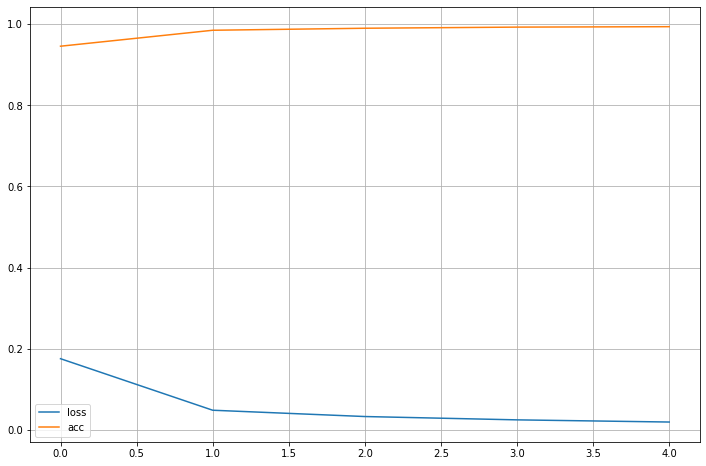

In [43]:
plt.figure(figsize = (12, 8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['acc'])
plt.legend(['loss', 'acc'])
plt.grid()
plt.show()

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [47]:
#랜덤 시드 고정시키기
np.random.seed(3)

#1. 데이터 생성하기
#모든 이미지를 1/255로 스케일 조정

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory('../source/DL/0902/keras4_cnn/train')

test_generator = test_datagen.flow_from_directory('../source/DL/0902/keras4_cnn/test',
                                                 target_size = (24, 24),
                                                 batch_size = 3,
                                                 class_mode = 'categorical')  #클래스 3개 -> 범주형

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [133]:
#2. 모델 생성하기
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3),
                activation = 'relu',
                input_shape = (24, 24, 3)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

In [138]:
#3. 모델 학습과정 설정하기
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam', metrics = ['accuracy'])

In [139]:
#4. 모델 학습시키기
model.fit_generator(train_generator,
                   steps_per_epoch = 15,
                   epochs = 50,
                   validation_data = test_generator,
                    validation_steps = 5)

Epoch 1/50


ValueError: Error when checking input: expected conv2d_29_input to have shape (426, 32, 4) but got array with shape (256, 256, 3)

In [246]:
#5. 모델 평가하기
scores = model.evaluate_generator(test_generator, steps = 5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

ValueError: Error when checking input: expected dense_95_input to have 2 dimensions, but got array with shape (3, 24, 24, 3)

In [256]:
#Breast cancer Wisconsin data 케라스를 이용해 유방암 예측하기
b_cancer = pd.read_csv('../source/breast-cancer-wisconsin-data.csv')
b_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [257]:
#불필요한 컬럼 제거
b_cancer = b_cancer.drop('id',axis=1)
b_cancer = b_cancer.drop('Unnamed: 32',axis=1)

In [258]:
#악성이면1, 양성이면 0인 컬럼 생성
b_cancer['diagnosis_1'] = 1
b_cancer['diagnosis_1'].loc[b_cancer['diagnosis'] == 'B'] = 0

In [259]:
y = b_cancer['diagnosis_1']

In [261]:
b_cancer1 = b_cancer.drop('diagnosis', axis = 1)

In [262]:
b_cancer2 = b_cancer1.drop('diagnosis_1', axis = 1)

In [273]:
b_cancer2.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [264]:
X = b_cancer2.values

In [269]:
np.shape(X)

(569, 30)

In [265]:
#데이터셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [278]:
#훈련셋 정규화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [282]:
#모델 생성하기

from keras.models import Sequential, Model
from keras.layers import Dense

model = Sequential()
model.add(Dense(128,activation="relu",input_dim = np.shape(X)[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit and test the model by randomly splitting it 
# 67% of the data for training and 33% of the data for validation
hist = model.fit(X_train,y_train, batch_size=5, epochs=10)

Epoch 1/10
426/426 [==============================] - 1s 3ms/step - loss: 0.3167 - acc: 0.8920
Epoch 2/10
426/426 [==============================] - 0s 404us/step - loss: 0.0814 - acc: 0.9742
Epoch 3/10
426/426 [==============================] - 0s 392us/step - loss: 0.0607 - acc: 0.9836
Epoch 4/10
426/426 [==============================] - 0s 434us/step - loss: 0.0507 - acc: 0.9836
Epoch 5/10
426/426 [==============================] - 0s 399us/step - loss: 0.0420 - acc: 0.9906
Epoch 6/10
426/426 [==============================] - 0s 423us/step - loss: 0.0334 - acc: 0.9906
Epoch 7/10
426/426 [==============================] - 0s 413us/step - loss: 0.0287 - acc: 0.9906
Epoch 8/10
426/426 [==============================] - 0s 411us/step - loss: 0.0270 - acc: 0.9930
Epoch 9/10
426/426 [==============================] - 0s 399us/step - loss: 0.0220 - acc: 0.9883
Epoch 10/10
426/426 [==============================] - 0s 420us/step - loss: 0.0207 - acc: 0.9906


In [283]:
score =  model.evaluate(X_test, y_test, verbose = 0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 0.1643717814679746
accuracy= 0.951048951048951


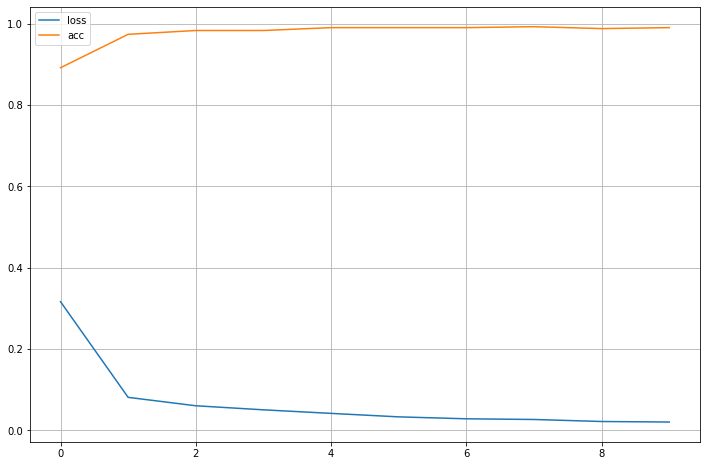

In [284]:
plt.figure(figsize = (12, 8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['acc'])
plt.legend(['loss', 'acc'])
plt.grid()
plt.show()

In [285]:
predicts = np.argmax(model.predict(X_test), axis = 1)
wrong_list = []
for n, pred in enumerate(predicts) :
    if pred != y_test[n] :
        wrong = X_test.iloc[n, ].copy()
        wrong["결과"] = y_test[n]
        wrong["예측"] = pred
        wrong_list.append(wrong)

pd.DataFrame(wrong_list)

KeyError: 0

In [244]:
#Kaggle example
data = pd.read_csv('../source/breast-cancer-wisconsin-data.csv')
data.head()

# Cleaning and modifying the data

from sklearn import preprocessing

data = data.drop('id',axis=1)
data = data.drop('Unnamed: 32',axis=1)
# Mapping Benign to 0 and Malignant to 1 
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
# Scaling the dataset
datas = pd.DataFrame(preprocessing.scale(data.iloc[:,1:32]))
datas.columns = list(data.iloc[:,1:32].columns)
datas['diagnosis'] = data['diagnosis']
# Creating the high dimensional feature space X
data_drop = datas.drop('diagnosis',axis=1)
X = data_drop.values

# Create a feed forward neural network with 3 hidden layers
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input 
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(128,activation="relu",input_dim = np.shape(X)[1]))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit and test the model by randomly splitting it 
# 67% of the data for training and 33% of the data for validation
model.fit(X, datas['diagnosis'], batch_size=5, epochs=10,validation_split=0.33)

Train on 381 samples, validate on 188 samples
Epoch 1/10
381/381 [==============================] - 1s 3ms/step - loss: 0.3055 - acc: 0.8976 - val_loss: 0.1171 - val_acc: 0.9681
Epoch 2/10
381/381 [==============================] - 0s 378us/step - loss: 0.1013 - acc: 0.9659 - val_loss: 0.0609 - val_acc: 0.9894
Epoch 3/10
381/381 [==============================] - 0s 383us/step - loss: 0.1015 - acc: 0.9738 - val_loss: 0.0901 - val_acc: 0.9681
Epoch 4/10
381/381 [==============================] - 0s 402us/step - loss: 0.0942 - acc: 0.9790 - val_loss: 0.0543 - val_acc: 0.9894
Epoch 5/10
381/381 [==============================] - 0s 417us/step - loss: 0.0615 - acc: 0.9790 - val_loss: 0.1058 - val_acc: 0.9628
Epoch 6/10
381/381 [==============================] - 0s 402us/step - loss: 0.0650 - acc: 0.9790 - val_loss: 0.0548 - val_acc: 0.9840
Epoch 7/10
381/381 [==============================] - 0s 370us/step - loss: 0.0452 - acc: 0.9895 - val_loss: 0.0754 - val_acc: 0.9787
Epoch 8/10
381/381

In [ ]:
#텍스트 정제 및 전처리
#정규화
#토큰화
#불용어처리
#어근화 
#어간추출 stemming
#음소표기 lemmatizing
#텍스트 데이터 벡터화 
    #One Hot Vector (수치형 데이터로 변환) -> 
    #벡터 사이즈가 크고 신경망 성능이 잘 나오지 않음
    #원-핫 벡터는 희소 벡터(sparse vector): 값이 대부분이 0으로 표현되는 벡터 또는 행렬(matrix)
    
#bag of words : 각 단어가 말뭉치에서 얼마나 많이 나타나는지말 헤아림
    #구조와 상관없이 단어의 출현횟수만 세기 때문에 텍스트를 담는 가방으로 생각할 수 있음
    #단어의 순서는 무시된다는 단점이 있다.
    
#TF IDF  : 단어 빈도 term frequency * 역문서 빈도 inverse document frequency
    #단순횟수만을 나타내기 때문에 문장 사이에 관계 유사도를 알 수 없다.

#word2Vec (word embedding to vector)
    #단어 사이에 연관성을 찾아 표시
    #분산된 텍스트 표현을 사용하여 개념 간 유사성을 본다.
    #단어를 훈련시킬 때 주변 단어를 라벨로 매치하여 최적화
    #CBOW : 앞뒤 단어를 보면서 단어를 유추하는 모델 / 전체 텍스트로 하나의 단어를 예측하기 때문에 작은 데이터셋에 유리하다
    #Skip gram :  타겟 단어들로부터 원본 단어를 역으로 예측하는 모델/ 큰 규모 데이터셋에 유리하다



In [2]:
import numpy as np
z = np.arange(12).reshape(2, 3, 2).swapaxes(1, 2)

In [3]:
z

array([[[ 0,  2,  4],
        [ 1,  3,  5]],

       [[ 6,  8, 10],
        [ 7,  9, 11]]])

In [4]:
np.ravel(z,)

array([ 0,  2,  4,  1,  3,  5,  6,  8, 10,  7,  9, 11])